In [1]:
import numpy as np
import idx2numpy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
train_images_path = '/home/ferrial/Documents/archive (2)/train-images-idx3-ubyte/train-images-idx3-ubyte'
train_labels_path = '/home/ferrial/Documents/archive (2)/train-labels-idx1-ubyte/train-labels-idx1-ubyte'


In [3]:
def preprocess_mnist(images_path, labels_path):
    images = idx2numpy.convert_from_file(images_path)
    labels = idx2numpy.convert_from_file(labels_path)

    images = images / 255.0

    images = images.reshape(images.shape[0], -1)

    labels_one_hot = np.zeros((labels.size, labels.max() + 1))
    labels_one_hot[np.arange(labels.size), labels] = 1

    return images, labels_one_hot

In [4]:
X, y = preprocess_mnist(train_images_path, train_labels_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [5]:
input_layer_size = X.shape[1]
hidden_layer_size = 128
output_layer_size = y.shape[1]

In [6]:
np.random.seed(42)
weights_input_hidden = np.random.rand(input_layer_size, hidden_layer_size) * 0.01
weights_hidden_output = np.random.rand(hidden_layer_size, output_layer_size) * 0.01

bias_hidden = np.zeros(hidden_layer_size)
bias_output = np.zeros(output_layer_size)

In [7]:
learning_rate = 0.01
epochs = 10
batch_size = 64

In [8]:
for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        hidden_layer_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = sigmoid(output_layer_input)

        error = y_batch - predicted_output

        d_predicted_output = error * sigmoid_derivative(predicted_output)
        error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
        weights_input_hidden += X_batch.T.dot(d_hidden_layer) * learning_rate

        bias_hidden += np.sum(d_hidden_layer, axis=0) * learning_rate
        bias_output += np.sum(d_predicted_output, axis=0) * learning_rate

    loss = np.mean(np.abs(error))
    print(f"Epoch {epoch + 1}, Loss: {loss}")


Epoch 1, Loss: 0.13906789364249653
Epoch 2, Loss: 0.06219775666146936
Epoch 3, Loss: 0.043849993470070875
Epoch 4, Loss: 0.03666261913766057
Epoch 5, Loss: 0.03283272542350376
Epoch 6, Loss: 0.03046434355931684
Epoch 7, Loss: 0.028827974719005445
Epoch 8, Loss: 0.027576970703587722
Epoch 9, Loss: 0.026551019805368482
Epoch 10, Loss: 0.02567476874652489


In [9]:
hidden_layer_input = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

In [10]:
predicted_output_binary = (predicted_output == predicted_output.max(axis=1, keepdims=True)).astype(int)


In [11]:
accuracy = accuracy_score(y_test.argmax(axis=1), predicted_output_binary.argmax(axis=1))
print(f"Test Accuracy: {accuracy}")


Test Accuracy: 0.934


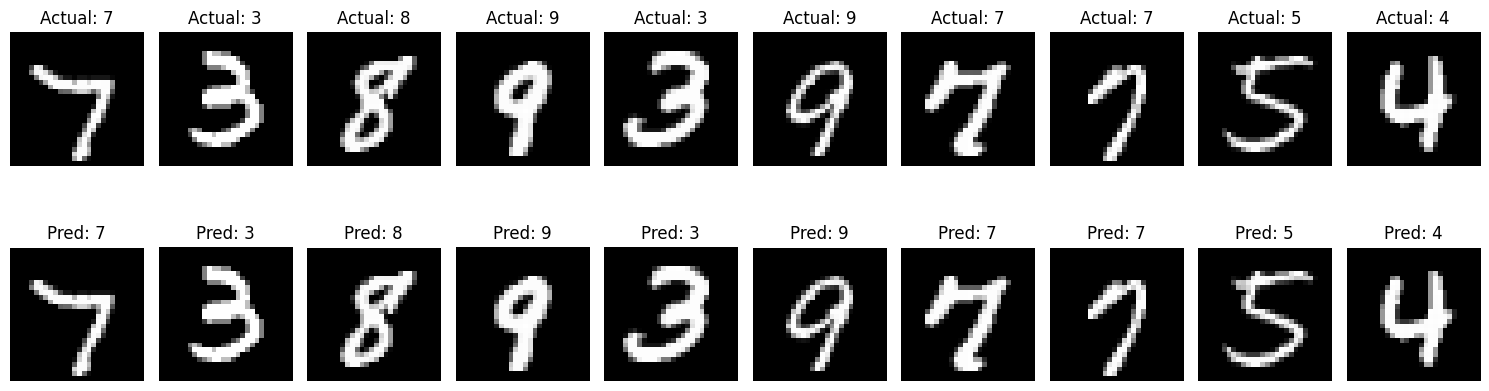

In [14]:
num_images_to_show = 10
X_test_sample = X_test[:num_images_to_show]
y_test_sample = y_test[:num_images_to_show]

# Forward pass to get predictions for the sample images
hidden_layer_input = np.dot(X_test_sample, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)  # Assuming binary outputs for each class

# Get the predicted labels by selecting the index of the highest value in the output
predicted_labels = (predicted_output > 0.5).astype(int).argmax(axis=1)
actual_labels = y_test_sample.argmax(axis=1)
plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test_sample[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Actual: {actual_labels[i]}')

    plt.subplot(2, 10, i + 11)
    plt.imshow(X_test_sample[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Pred: {predicted_labels[i]}')

plt.tight_layout()
plt.show()